In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\pitta\OneDrive\Documents\sssit data science 5.30 cls\All_data_sets\All_data_sets\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print("Data Loaded Successfully!\n")
print("Shape of dataset:", df.shape)

Data Loaded Successfully!

Shape of dataset: (284807, 31)


In [4]:
print("\n--- Dataset Info ---\n")
print(df.info())


--- Dataset Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  

In [5]:
print("\n--- Missing Values ---\n")
print(df.isnull().sum().sum())


--- Missing Values ---

0


In [6]:
print("\n--- Basic Statistics ---\n")
print(df.describe())


--- Basic Statistics ---

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247

In [7]:
print("\n--- Class Distribution ---\n")
print(df['Class'].value_counts())
print("\nClass Proportion:")
print(df['Class'].value_counts(normalize=True))


--- Class Distribution ---

Class
0    284315
1       492
Name: count, dtype: int64

Class Proportion:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


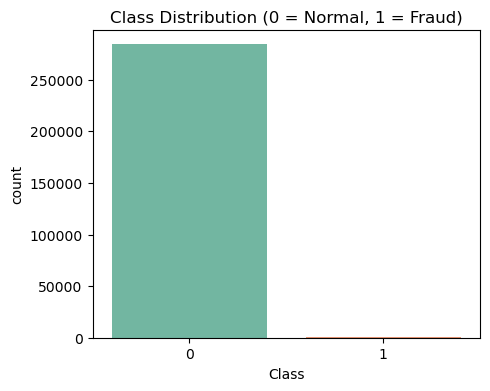

In [8]:
plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title('Class Distribution (0 = Normal, 1 = Fraud)')
plt.show()

In [9]:
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [10]:
new_df = df.drop(['Time', 'Amount'], axis=1)

In [11]:
cols = ['scaled_time', 'scaled_amount'] + [c for c in new_df.columns if c not in ['scaled_time', 'scaled_amount']]
new_df = new_df[cols]
print("\nAfter Scaling:", new_df.shape)


After Scaling: (284807, 31)


In [12]:
x = new_df.drop('Class', axis=1)
y= new_df['Class']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


print("Training set:", x_train.shape)
print("Testing set:", x_test.shape)

Training set: (227845, 30)
Testing set: (56962, 30)


In [14]:
print("\nBefore SMOTE:")
print(y_train.value_counts())


Before SMOTE:
Class
0    227451
1       394
Name: count, dtype: int64


In [15]:
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [16]:
print("\nAfter SMOTE:")
print(pd.Series(y_train_res).value_counts())


After SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


In [17]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(x_train_res, y_train_res)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [18]:
print("\nModel Trained Successfully!")


Model Trained Successfully!


In [19]:
y_pred = rf_model.predict(x_test)
y_prob = rf_model.predict_proba(x_test)[:,1]

In [20]:
print("\n--- Classification Report ---\n")
print(classification_report(y_test, y_pred, digits=4))


--- Classification Report ---

              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8421    0.8163    0.8290        98

    accuracy                         0.9994     56962
   macro avg     0.9209    0.9080    0.9144     56962
weighted avg     0.9994    0.9994    0.9994     56962



In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.999420666409185
ROC AUC: 0.9729292339473774


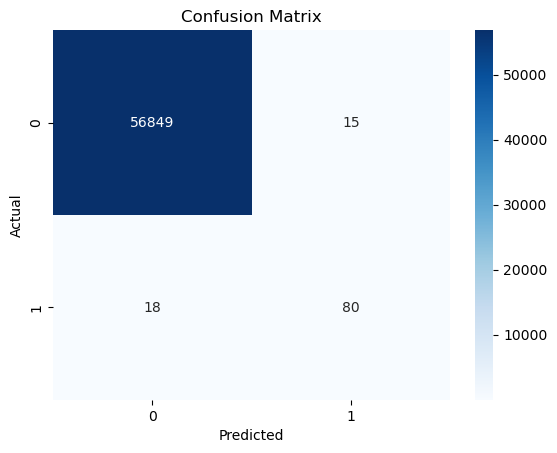

In [28]:
#cm = confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#plt.title('Confusion Matrix')
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.show()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

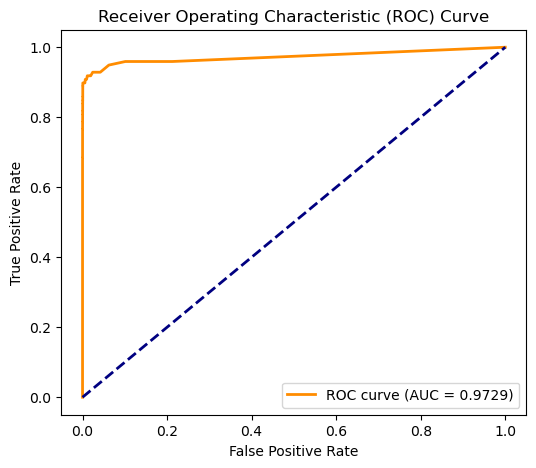

In [29]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_prob):.4f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [30]:
importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': rf_model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)

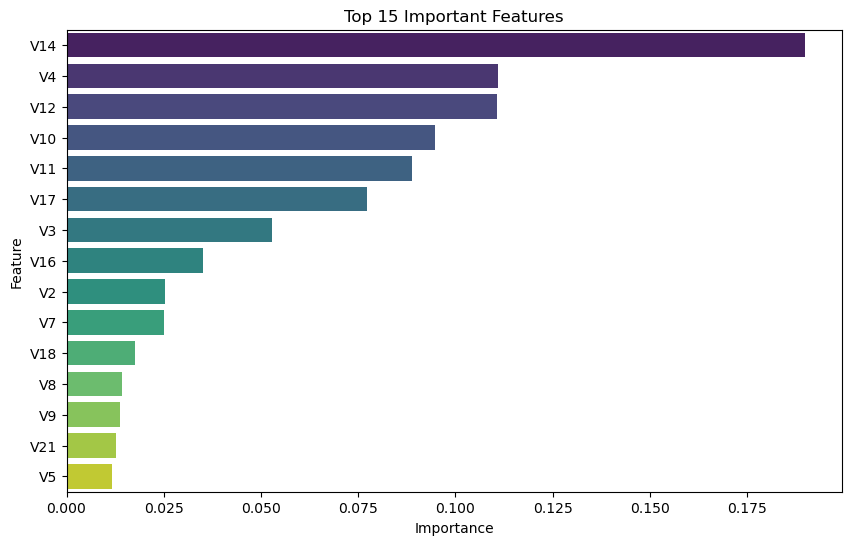

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importances.head(15), palette='viridis')
plt.title('Top 15 Important Features')
plt.show()

In [32]:
joblib.dump(rf_model, 'random_forest_fraud_model.joblib')
print("\nModel saved as 'random_forest_fraud_model.joblib'")


Model saved as 'random_forest_fraud_model.joblib'
